<a href="https://colab.research.google.com/github/nhuong3105/UCSC-data/blob/main/Drug_Prediction_ANN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install padelpy

     |████████████████████████████████| 20.9 MB 6.4 MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

Importing training data 

In [3]:
df = pd.read_csv ('/content/drive/MyDrive/Aritfical Interligent_Machine Learning_Deep Learning/data/Midterm_dataset_training.csv')

In [5]:
df

,Name,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,...,Feature986,Feature987,Feature988,Feature989,Feature990,Feature991,Feature992,Feature993,Feature994,Feature995,Feature996,Feature997,Feature998,Feature999,Feature1000,Feature1001,Feature1002,Feature1003,Feature1004,Feature1005,Feature1006,Feature1007,Feature1008,Feature1009,Feature1010,Feature1011,Feature1012,Feature1013,Feature1014,Feature1015,Feature1016,Feature1017,Feature1018,Feature1019,Feature1020,Feature1021,Feature1022,Feature1023,Feature1024,Bioactivity
0,Drug1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,active
1,Drug2,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,1,1,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,1,0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,active
2,Drug3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,active
3,Drug4,0,0,1,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,active
4,Drug5,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12070,Drug12071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,inactive
12071,Drug12072,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,inactive
12072,Drug12073,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,inactive
12073,Drug12074,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,inactive


In [9]:
df.shape 

(12075, 1026)

Checking data information

In [8]:
df ['Bioactivity'].unique ()

array(['active', 'inactive', nan], dtype=object)

In [10]:
import seaborn as sns

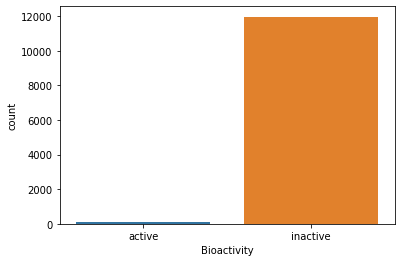

In [11]:
sns.countplot(x='Bioactivity',data=df)

Preprocssing data

In [12]:
dt= df.dropna()

In [13]:
dt.shape 

(12074, 1026)

In [15]:
dt.drop(['Name'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
dt.head(2)

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,...,Feature986,Feature987,Feature988,Feature989,Feature990,Feature991,Feature992,Feature993,Feature994,Feature995,Feature996,Feature997,Feature998,Feature999,Feature1000,Feature1001,Feature1002,Feature1003,Feature1004,Feature1005,Feature1006,Feature1007,Feature1008,Feature1009,Feature1010,Feature1011,Feature1012,Feature1013,Feature1014,Feature1015,Feature1016,Feature1017,Feature1018,Feature1019,Feature1020,Feature1021,Feature1022,Feature1023,Feature1024,Bioactivity
0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,active
1,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,...,0,0,1,0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,active


In [17]:
type(dt)

pandas.core.frame.DataFrame

In [18]:
dt.Bioactivity.replace(to_replace=dict(active=1, inactive=0), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [19]:
dt.head (2)

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,...,Feature986,Feature987,Feature988,Feature989,Feature990,Feature991,Feature992,Feature993,Feature994,Feature995,Feature996,Feature997,Feature998,Feature999,Feature1000,Feature1001,Feature1002,Feature1003,Feature1004,Feature1005,Feature1006,Feature1007,Feature1008,Feature1009,Feature1010,Feature1011,Feature1012,Feature1013,Feature1014,Feature1015,Feature1016,Feature1017,Feature1018,Feature1019,Feature1020,Feature1021,Feature1022,Feature1023,Feature1024,Bioactivity
0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,...,0,0,1,0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1


In [20]:
X = dt.drop(['Bioactivity'], axis=1)
Y = dt['Bioactivity']

In [21]:
X.head (2)

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,...,Feature985,Feature986,Feature987,Feature988,Feature989,Feature990,Feature991,Feature992,Feature993,Feature994,Feature995,Feature996,Feature997,Feature998,Feature999,Feature1000,Feature1001,Feature1002,Feature1003,Feature1004,Feature1005,Feature1006,Feature1007,Feature1008,Feature1009,Feature1010,Feature1011,Feature1012,Feature1013,Feature1014,Feature1015,Feature1016,Feature1017,Feature1018,Feature1019,Feature1020,Feature1021,Feature1022,Feature1023,Feature1024
0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,...,0,0,0,1,0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0


In [22]:
Y.head ()

0    1
1    1
2    1
3    1
4    1
Name: Bioactivity, dtype: int64

In [23]:
import numpy as np

In [24]:
from collections import Counter
counter = Counter(Y)
print(counter)

Counter({0: 11974, 1: 100})


In [25]:
!pip install imbalanced-learn

In [26]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
##from numpy import where
# transform the dataset
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [27]:
counter = Counter(Y)
print(counter)

Counter({1: 11974, 0: 11974})


In [28]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size = 0.2, random_state = 101, stratify=Y)

In [29]:
from keras.models import Sequential
from keras.layers import Dense

In [30]:
# Define the keras sequential model with three hidden layers
model = Sequential()
model.add(Dense(24, 
                input_shape=(1024,), 
                activation='relu', 
                kernel_initializer='RandomNormal'))

model.add(Dense(12, 
                activation='relu',
                kernel_initializer='RandomNormal'))

model.add(Dense(1, activation='sigmoid'))

In [31]:
# Compile the keras model for classification accuracy
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [32]:
# Fit the model on the training dataset
model.fit( X_train, Y_train, epochs=16, batch_size=10,verbose=0, )

In [33]:
# Evaluate and print the model accuracy on test dataset
accuracy_test = model.evaluate(X_test, Y_test)
print("")
print("Test Accuracy     : " + str(accuracy_test[1]))

150/150 [==============================] - 0s 1ms/step - loss: 0.0794 - accuracy: 0.9942

Test Accuracy     : 0.9941545128822327


In [34]:
Y_predict = (model.predict(X_test) > 0.5).astype('int32')
#Y_pred_prob = model.predict(X_test)

In [35]:
#Y_predict

In [36]:
import numpy as np
np.count_nonzero(Y_predict)

2401

In [37]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict)

In [38]:
confusion_matrix

array([[2378,   17],
       [  11, 2384]])

In [39]:
test = pd.read_csv('/content/drive/MyDrive/Aritfical Interligent_Machine Learning_Deep Learning/data/Midterm_dataset_validation.csv')
test

,Name,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,...,Feature985,Feature986,Feature987,Feature988,Feature989,Feature990,Feature991,Feature992,Feature993,Feature994,Feature995,Feature996,Feature997,Feature998,Feature999,Feature1000,Feature1001,Feature1002,Feature1003,Feature1004,Feature1005,Feature1006,Feature1007,Feature1008,Feature1009,Feature1010,Feature1011,Feature1012,Feature1013,Feature1014,Feature1015,Feature1016,Feature1017,Feature1018,Feature1019,Feature1020,Feature1021,Feature1022,Feature1023,Feature1024
0,Drug1,0,0,1,0.0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
1,Drug2,0,0,1,0.0,0,0,1,0,0,0,0,1,0,1,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,...,1,1,1,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Drug3,1,0,1,0.0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Drug4,0,1,0,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Drug5,0,1,0,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,Drug4048,0,0,0,1.0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0
4048,Drug4049,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4049,Drug4050,1,0,1,0.0,1,0,0,0,1,0,0,1,1,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0
4050,Drug4051,0,0,1,0.0,1,0,1,0,1,1,0,1,1,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0


In [40]:
X_true= test.drop (['Name'],axis=1)

In [41]:
X_true.head (2)

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,...,Feature985,Feature986,Feature987,Feature988,Feature989,Feature990,Feature991,Feature992,Feature993,Feature994,Feature995,Feature996,Feature997,Feature998,Feature999,Feature1000,Feature1001,Feature1002,Feature1003,Feature1004,Feature1005,Feature1006,Feature1007,Feature1008,Feature1009,Feature1010,Feature1011,Feature1012,Feature1013,Feature1014,Feature1015,Feature1016,Feature1017,Feature1018,Feature1019,Feature1020,Feature1021,Feature1022,Feature1023,Feature1024
0,0,0,1,0.0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0.0,0,0,1,0,0,0,0,1,0,1,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,...,1,1,1,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [42]:
X_true.dropna()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,...,Feature985,Feature986,Feature987,Feature988,Feature989,Feature990,Feature991,Feature992,Feature993,Feature994,Feature995,Feature996,Feature997,Feature998,Feature999,Feature1000,Feature1001,Feature1002,Feature1003,Feature1004,Feature1005,Feature1006,Feature1007,Feature1008,Feature1009,Feature1010,Feature1011,Feature1012,Feature1013,Feature1014,Feature1015,Feature1016,Feature1017,Feature1018,Feature1019,Feature1020,Feature1021,Feature1022,Feature1023,Feature1024
0,0,0,1,0.0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0.0,0,0,1,0,0,0,0,1,0,1,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,...,1,1,1,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0.0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,0,0,0,1.0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0
4048,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4049,1,0,1,0.0,1,0,0,0,1,0,0,1,1,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0
4050,0,0,1,0.0,1,0,1,0,1,1,0,1,1,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0


In [43]:
type(X_true)

pandas.core.frame.DataFrame

In [44]:
Y_predict = (model.predict(X_true) > 0.5).astype('int32')

In [45]:
import numpy as np
np.count_nonzero(Y_predict)

34